In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Downloads/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.duplicated().sum()

1256

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
#replacing the 0 values from['Glucose','BloodPressure','SkinThickness','Insulin','BMI']by nan
df_copy=df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

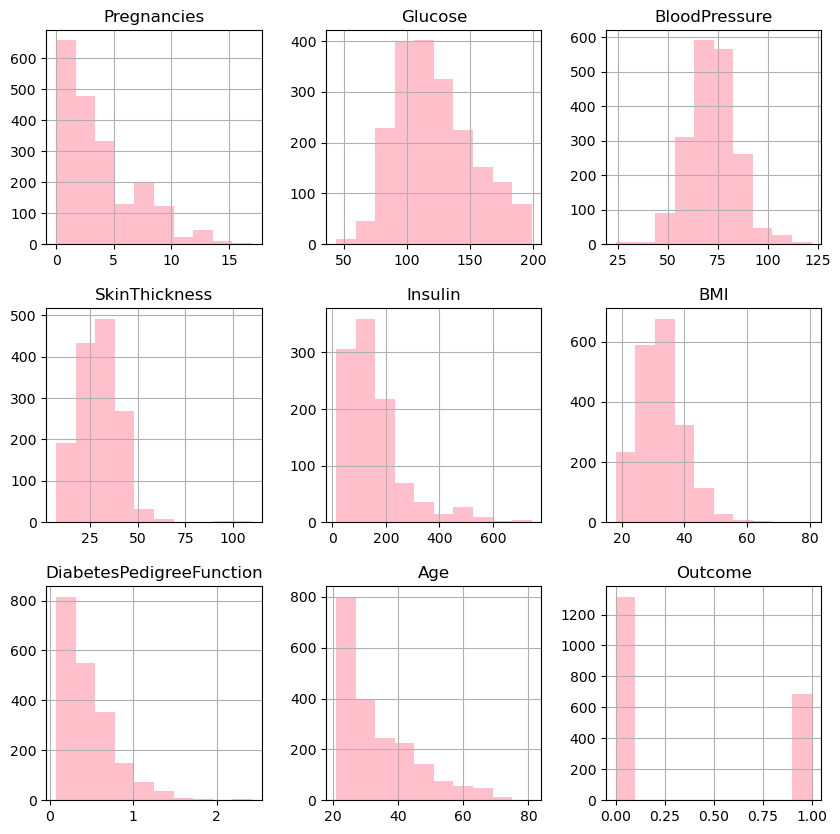

In [12]:
#to fill these nan values the data distribution needs to be understood
#plotting histogram of dataset before replacing nan values
p=df_copy.hist(figsize=(10,10),color='pink')

In [13]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(),inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13972\3726666992.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_13972\3726666992.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

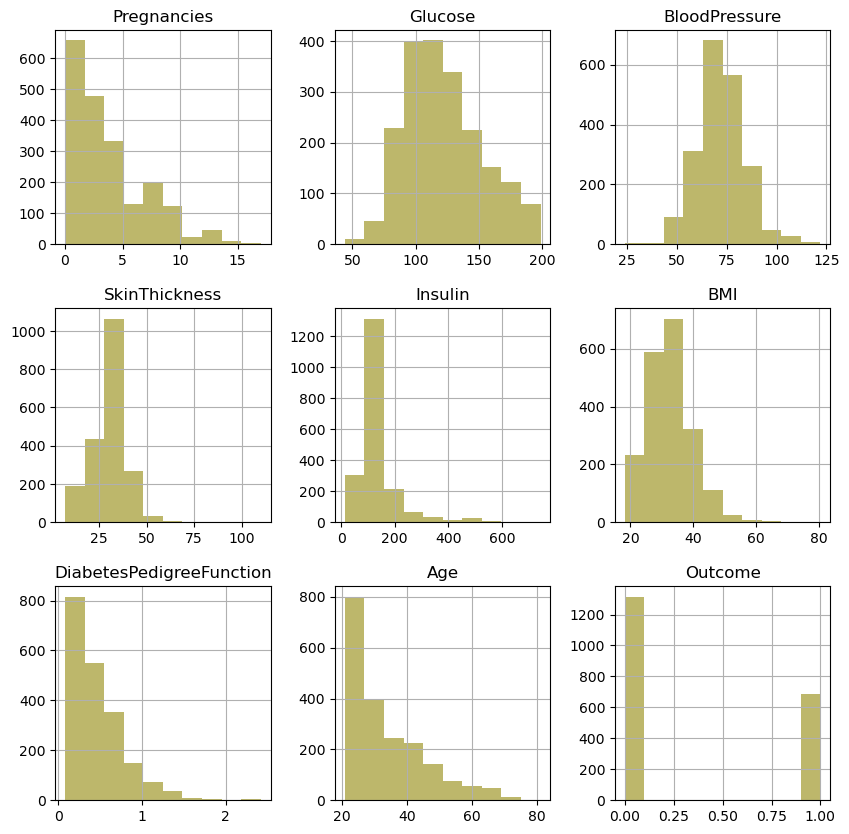

In [14]:
p=df_copy.hist(figsize=(10,10),color='darkkhaki')

In [15]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13972\3120884441.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_13972\3120884441.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

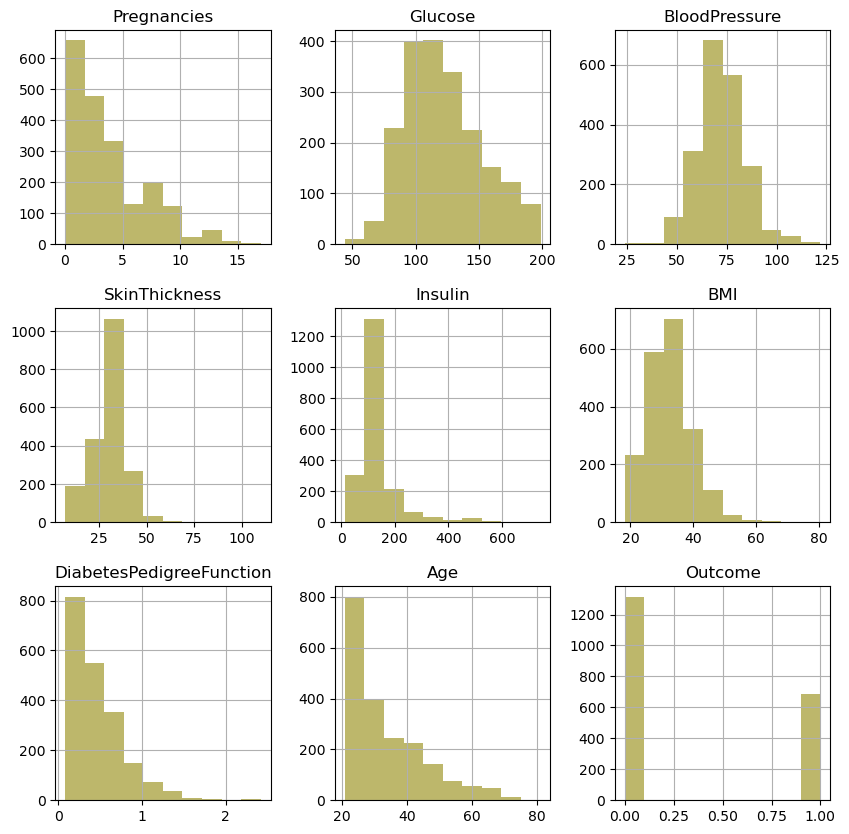

In [16]:
p=df_copy.hist(figsize=(10,10),color='darkkhaki')

In [17]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

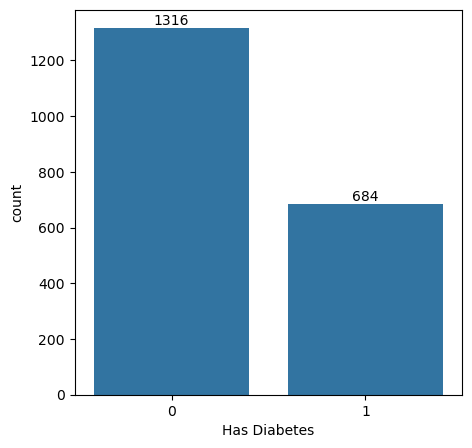

In [18]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Outcome',data=df_copy)
for bars in ax.containers:
  ax.bar_label(bars)
  plt.xlabel('Has Diabetes')
  plt.ylabel('count')
  plt.show()

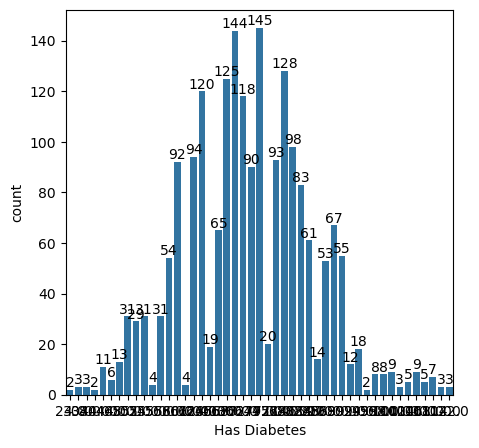

In [19]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='BloodPressure',data=df_copy)
for bars in ax.containers:
  ax.bar_label(bars)
  plt.xlabel('Has Diabetes')
  plt.ylabel('count')
  plt.show()

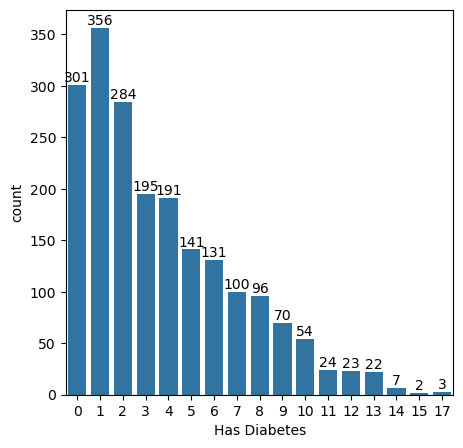

In [20]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Pregnancies',data=df_copy)
for bars in ax.containers:
  ax.bar_label(bars)
  plt.xlabel('Has Diabetes')
  plt.ylabel('count')
  plt.show()

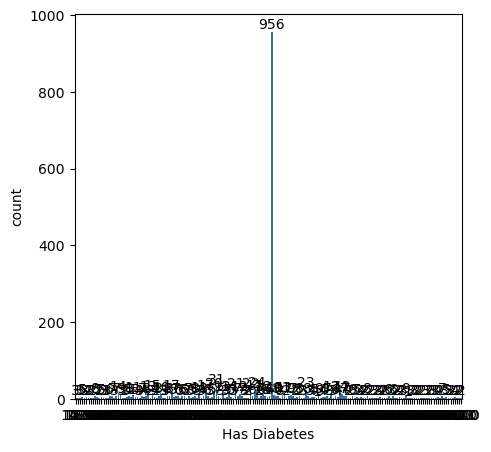

In [21]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Insulin',data=df_copy)
for bars in ax.containers:
  ax.bar_label(bars)
  plt.xlabel('Has Diabetes')
  plt.ylabel('count')
  plt.show()

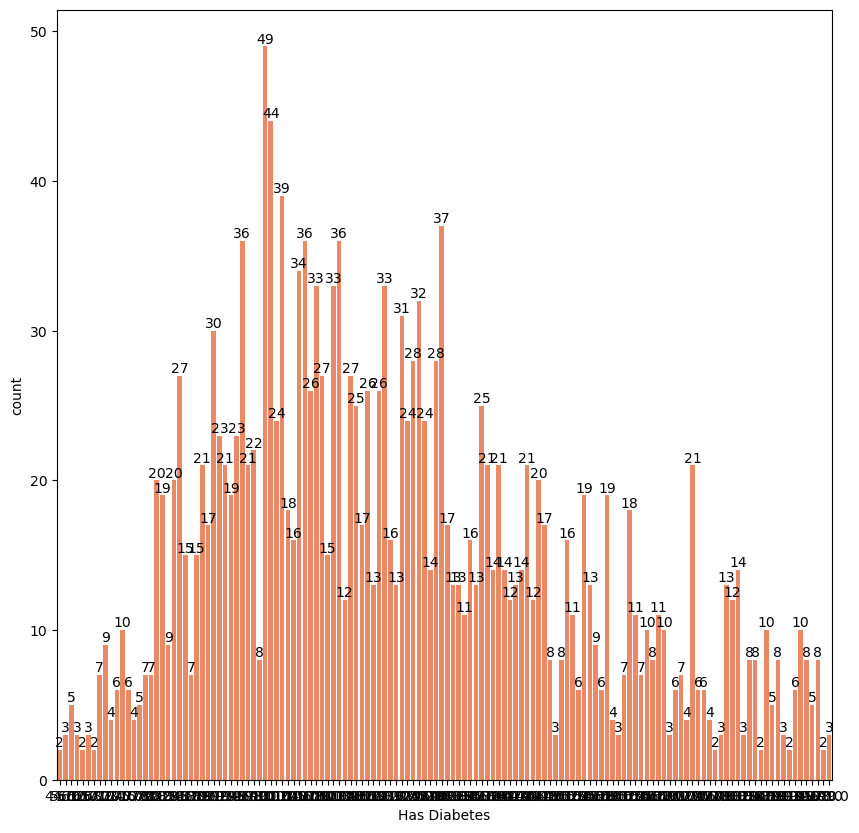

In [22]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='Glucose',data=df_copy,color="coral")
for bars in ax.containers:
  ax.bar_label(bars)
  plt.xlabel('Has Diabetes')
  plt.ylabel('count')
  plt.show()

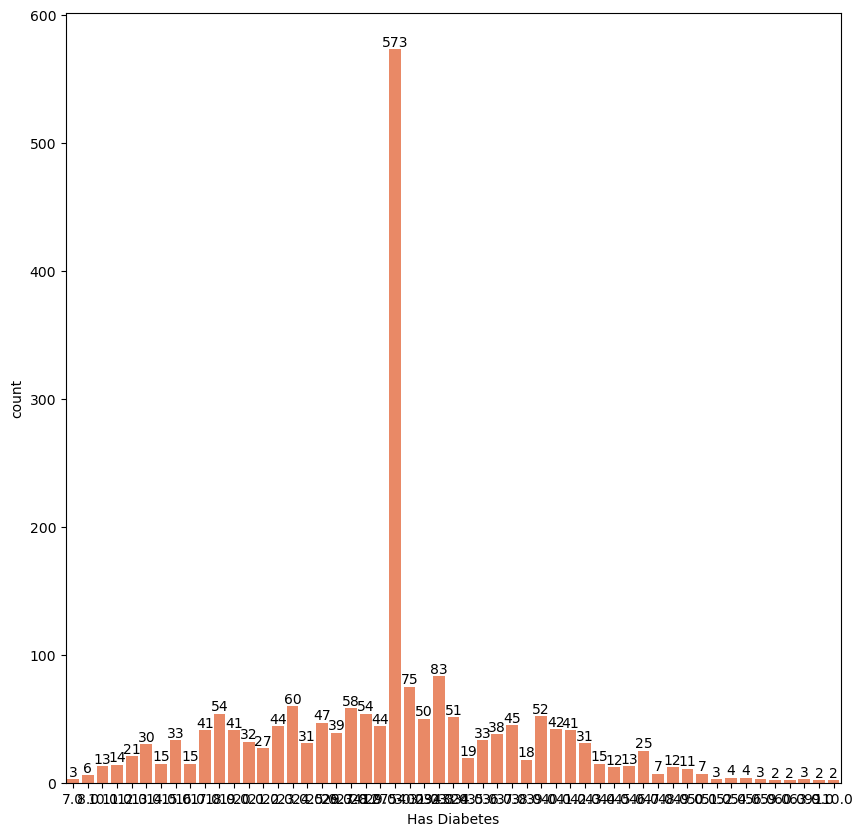

In [23]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='SkinThickness',data=df_copy,color="coral")
for bars in ax.containers:
  ax.bar_label(bars)
  plt.xlabel('Has Diabetes')
  plt.ylabel('count')
  plt.show()

Text(0.5, 1.0, 'Insulin vs Outcome')

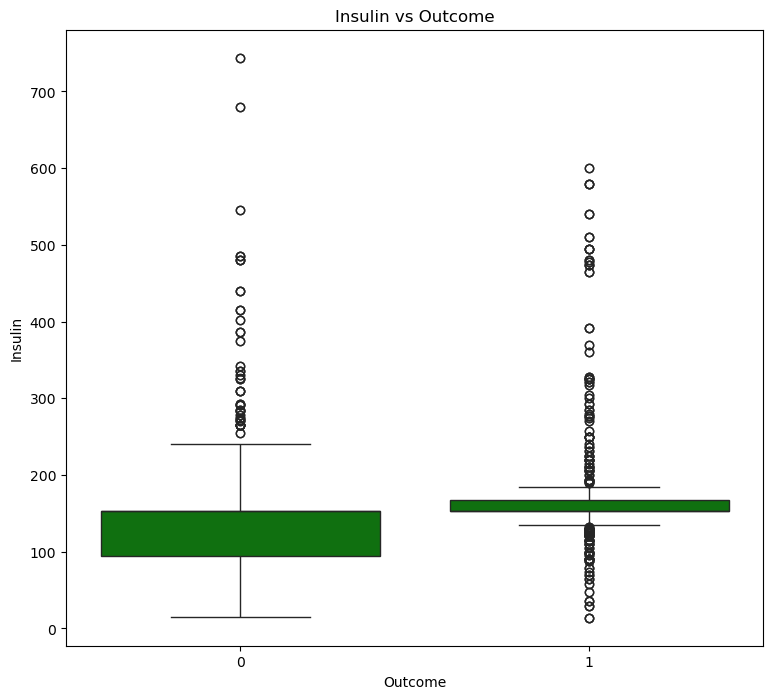

In [24]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x="Outcome",y="Insulin",color="green")
plt.title("Insulin vs Outcome")

Text(0.5, 1.0, 'Glucose vs Outcome')

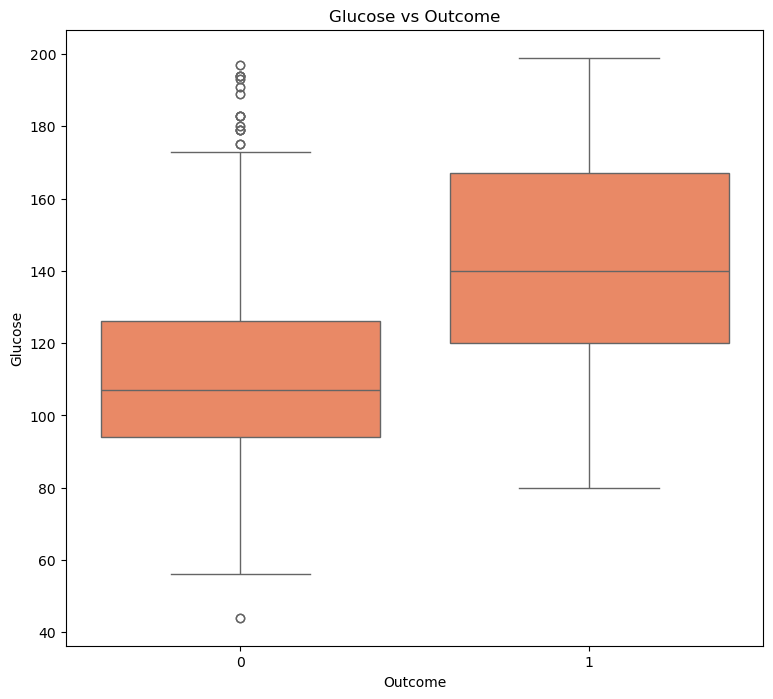

In [25]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x="Outcome",y="Glucose",color="coral")
plt.title("Glucose vs Outcome")

Text(0.5, 1.0, 'BloodPressure vs Outcome')

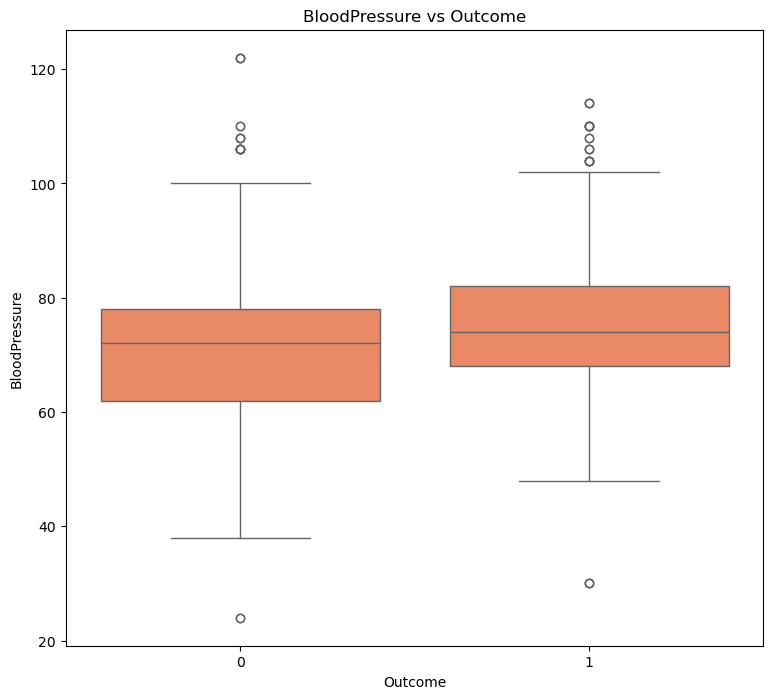

In [26]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x="Outcome",y="BloodPressure",color="coral")
plt.title("BloodPressure vs Outcome")

Text(0.5, 1.0, 'Age vs Outcome')

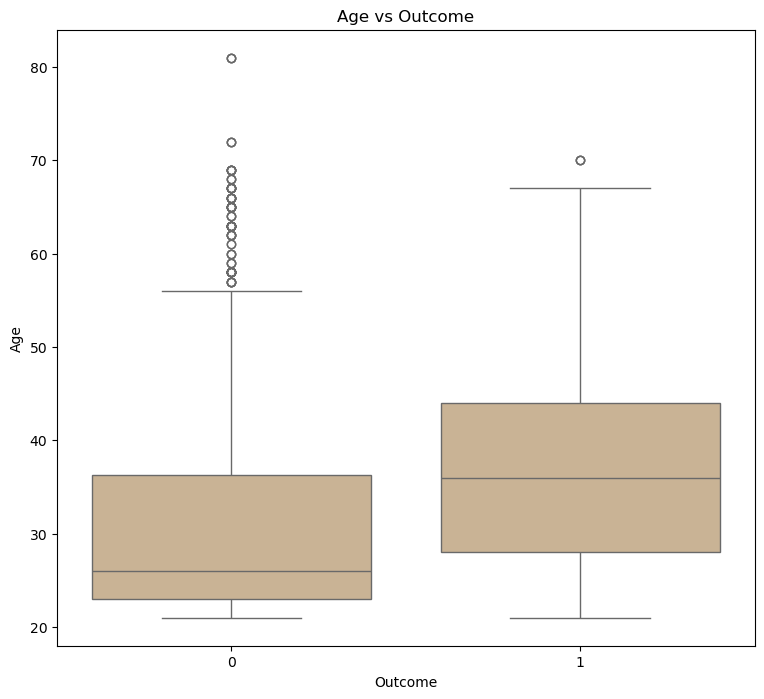

In [27]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x="Outcome",y="Age",color="tan")
plt.title("Age vs Outcome")

Text(0.5, 1.0, 'BMI vs Outcome')

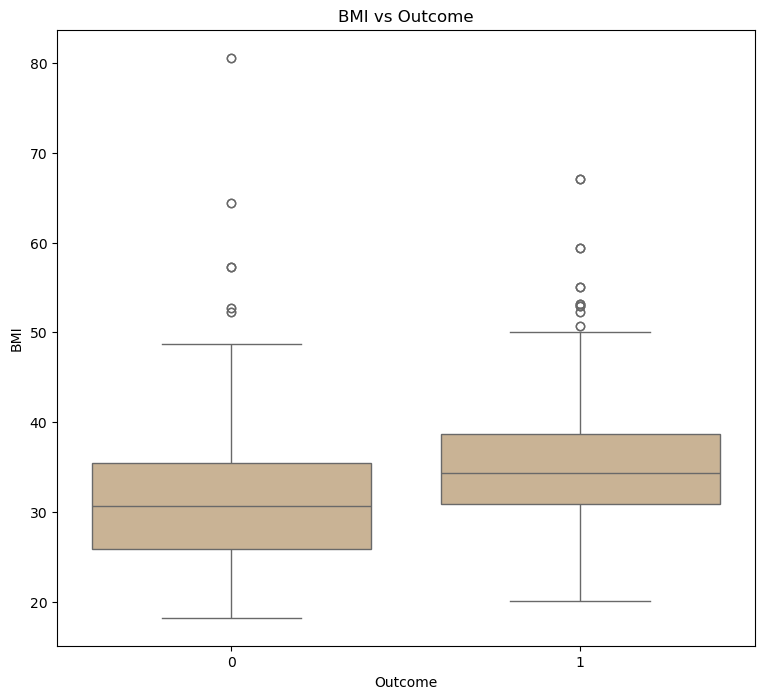

In [28]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x="Outcome",y="BMI",color="tan")
plt.title("BMI vs Outcome")

Text(0.5, 1.0, 'SkinThickness vs Outcome')

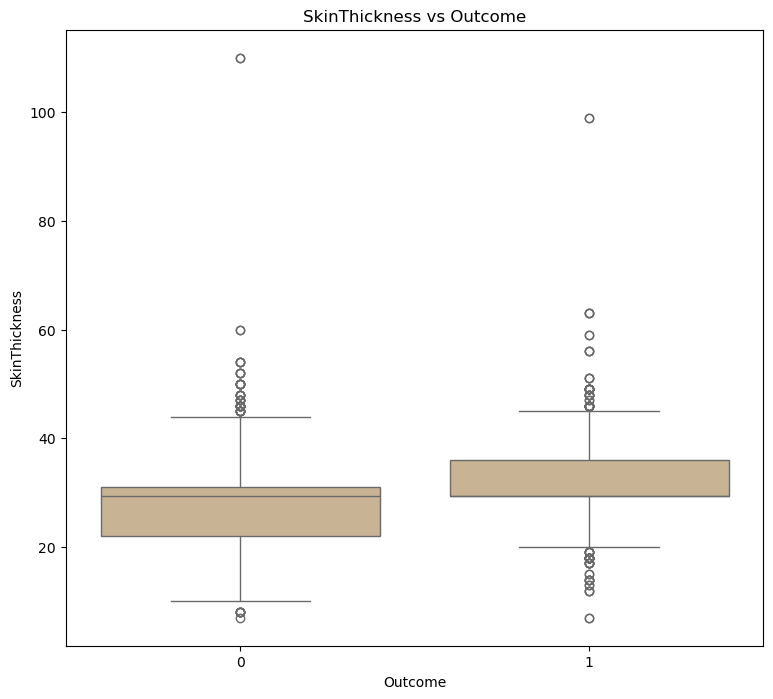

In [29]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x="Outcome",y="SkinThickness",color="tan")
plt.title("SkinThickness vs Outcome")

Text(0.5, 1.0, 'Pregnancies vs Outcome')

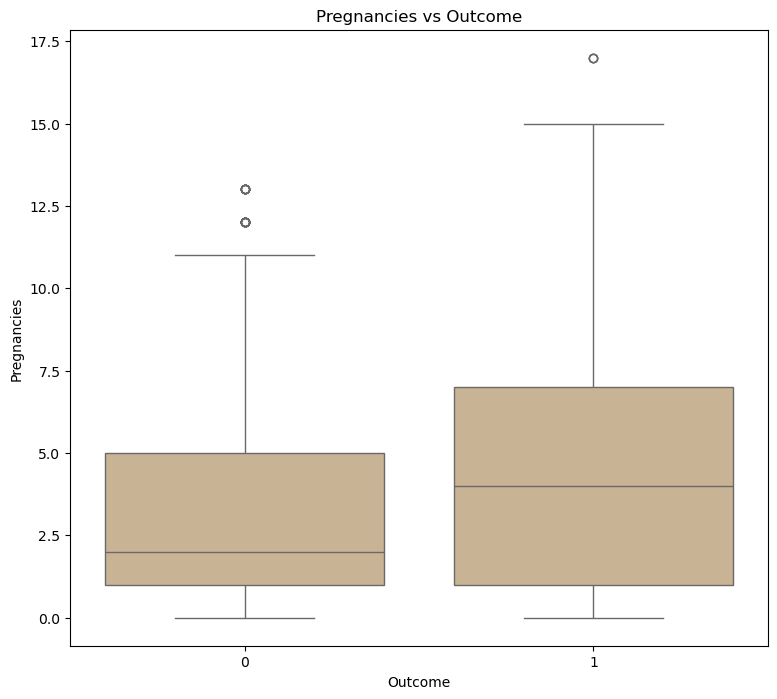

In [30]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x="Outcome",y="Pregnancies",color="tan")
plt.title("Pregnancies vs Outcome")

In [31]:
from sklearn.model_selection import train_test_split
X=df_copy.drop(columns='Outcome')
y=df_copy['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print('X_train_size:{},X_test size:{}'.format(X_train.shape,X_test.shape))

X_train_size:(1600, 8),X_test size:(400, 8)


In [32]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75.0,64.000000,24.000000,55.000000,29.7,0.370,33
1996,8,179.0,72.000000,42.000000,130.000000,32.7,0.719,36
1997,6,85.0,78.000000,29.341275,153.743295,31.2,0.382,42
1998,0,129.0,110.000000,46.000000,130.000000,67.1,0.319,26


In [33]:
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
X_train

array([[ 2.54014777, -0.03778511,  0.47339657, ..., -0.8606448 ,
        -0.65077302,  2.50732972],
       [ 4.06518958,  1.32678364, -0.03517   , ...,  1.12024994,
         1.04381097,  1.21199837],
       [-0.81494422, -0.65509002,  0.13435219, ...,  0.92766295,
        -0.5475188 ,  0.78022125],
       ...,
       [ 0.10008087, -0.88251815, -0.71325877, ..., -0.10405306,
        -0.94838813, -0.16968841],
       [ 2.23513941, -1.20741547,  0.13435219, ..., -0.36542111,
        -0.52626057,  0.17573329],
       [ 0.40508923,  0.44956087,  0.81244096, ..., -0.01462372,
         0.50628164,  3.11181769]])

In [36]:
X_test

array([[-0.50993586,  0.02719435, -2.0694363 , ...,  1.2853245 ,
         0.14185498, -0.60146553],
       [-0.50993586, -0.5251311 , -1.39134754, ..., -0.51673946,
        -0.14361258, -0.94688722],
       [ 0.71009759,  2.36645507, -0.20469219, ..., -0.25537141,
        -0.44122769, -0.16968841],
       ...,
       [-0.81494422,  0.87192739, -0.37421439, ..., -0.47547082,
        -0.37745302,  0.78022125],
       [-0.50993586,  1.06686578, -1.73039192, ...,  0.81761324,
        -0.70847391, -0.68782095],
       [ 0.71009759, -0.75255922, -1.05230315, ..., -0.80561994,
         0.07200653, -0.08333298]])

In [37]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [38]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred_dt=model_dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,y_pred_dt)
precision_dt=precision_score(y_test,y_pred_dt)
recall_dt=recall_score(y_test,y_pred_dt)
f1_dt=f1_score(y_test,y_pred_dt)
conf_matrix_dt=confusion_matrix(y_test,y_pred_dt)
class_report_dt=classification_report(y_test,y_pred_dt)
print('Decision Tree Metrics:')
print('Accuracy:',accuracy_dt,2)
print('Precision:',precision_dt,2)
print('Recall:',recall_dt,2)
print('F1 Score:',f1_dt,2)
print('confusion Matrix:/n',conf_matrix_dt)
print('Classification Report:/n',class_report_dt)

Decision Tree Metrics:
Accuracy: 0.9925 2
Precision: 0.9921259842519685 2
Recall: 0.984375 2
F1 Score: 0.9882352941176471 2
confusion Matrix:/n [[271   1]
 [  2 126]]
Classification Report:/n               precision    recall  f1-score   support

           0       0.99      1.00      0.99       272
           1       0.99      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [39]:
model_dt=RandomForestClassifier()
model_dt.fit(X_train,y_train)
y_pred_dt=model_dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,y_pred_dt)
precision_dt=precision_score(y_test,y_pred_dt)
recall_dt=recall_score(y_test,y_pred_dt)
f1_dt=f1_score(y_test,y_pred_dt)
conf_matrix_dt=confusion_matrix(y_test,y_pred_dt)
class_report_dt=classification_report(y_test,y_pred_dt)
print('Random forest Metrics:')
print('Accuracy:',accuracy_dt,2)
print('Precision:',precision_dt,2)
print('Recall:',recall_dt,2)
print('F1 Score:',f1_dt,2)
print('confusion Matrix:/n',conf_matrix_dt)
print('Classification Report:/n',class_report_dt)

Random forest Metrics:
Accuracy: 0.9925 2
Precision: 1.0 2
Recall: 0.9765625 2
F1 Score: 0.9881422924901185 2
confusion Matrix:/n [[272   0]
 [  3 125]]
Classification Report:/n               precision    recall  f1-score   support

           0       0.99      1.00      0.99       272
           1       1.00      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [40]:
#initialize the svm classifier
from sklearn.svm import SVC
model_svm=SVC(random_state=42)
#train the model
model_svm.fit(X_train,y_train)
#make predictions
y_pred_svm=model_svm.predict(X_test)
#calculate performance metrics
accuracy_svm=accuracy_score(y_test,y_pred_svm)
precision_svm=precision_score(y_test,y_pred_svm)
recall_svm=recall_score(y_test,y_pred_svm)
f1_svm=f1_score(y_test,y_pred_svm)
conf_matrix_svm=confusion_matrix(y_test,y_pred_svm)
class_report_svm=classification_report(y_test,y_pred_svm)
print('SVM Metrics:')
print('Accuracy:',round(accuracy_svm,2))
print('Precision:',round(precision_svm,2))
print('Recall:',round(recall_svm,2))
print('F1-score:',round(f1_svm,2))
print('Confusion Matrix:\n',conf_matrix_svm)
print('Classification Report:\n',class_report_svm)

SVM Metrics:
Accuracy: 0.84
Precision: 0.81
Recall: 0.67
F1-score: 0.74
Confusion Matrix:
 [[252  20]
 [ 42  86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       272
           1       0.81      0.67      0.74       128

    accuracy                           0.84       400
   macro avg       0.83      0.80      0.81       400
weighted avg       0.84      0.84      0.84       400



In [41]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
model=DecisionTreeClassifier(random_state=42)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results_dt=cross_val_score(model_dt,X,y,cv=ssplit)
print('DecisioN Tree Cross validation Results:',results_dt)
print('Mean Accuracy:',np.mean(results_dt))

DecisioN Tree Cross validation Results: [0.95166667 0.98       0.96833333 0.95       0.95833333 0.95833333
 0.95333333 0.96666667 0.95166667 0.94666667]
Mean Accuracy: 0.9585000000000001


In [42]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
model_rf=RandomForestClassifier(n_estimators=100,random_state=42)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results_rf=cross_val_score(model_rf,X,y,cv=ssplit)
print('Random Forest Cross validation Results:',results_rf)
print('Mean Accuracy:',np.mean(results_rf))

Random Forest Cross validation Results: [0.98       0.97       0.95166667 0.97333333 0.94333333 0.94
 0.935      0.94833333 0.96333333 0.97166667]
Mean Accuracy: 0.9576666666666668


In [43]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
model_svm=SVC(random_state=42)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results_svm=cross_val_score(model_svm,X,y,cv=ssplit)
print('Random Forest Cross validation Results:',results_svm)
print('Mean Accuracy:',np.mean(results_svm))

Random Forest Cross validation Results: [0.77833333 0.785      0.77166667 0.77       0.755      0.77
 0.755      0.75       0.75166667 0.765     ]
Mean Accuracy: 0.7651666666666667


In [44]:
import pickle
from sklearn.ensemble import RandomForestClassifier
model_dt = RandomForestClassifier()
model_dt.fit(X_train,y_train)
with open('diabetes_model.pkl','wb') as file:
  pickle.dump(model_dt,file)
print('Model saved successfully')

Model saved successfully


In [45]:
with open('sc.pkl','wb')as scaler_file:
  pickle.dump(sc,scaler_file)

In [46]:
pip install --upgrade streamlit

In [48]:
streamlit_code = """
import streamlit as st
import pickle
import numpy as np

# Load the trained RandomForest model and scaler
with open('diabetes_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('sc.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Create the web app
st.title('Diabetes Prediction App')

# Input fields
Pregnancies = st.number_input('Pregnancies', min_value=0.0, max_value=20.0, value=0.0, step=1.0)
Glucose = st.number_input('Glucose', min_value=0.0, max_value=400.0, value=30.0, step=1.0)
BloodPressure = st.number_input('BloodPressure', min_value=0.0, max_value=200.0, value=0.0, step=1.0)
SkinThickness = st.number_input('SkinThickness', min_value=0.0, max_value=200.0, value=0.0, step=1.0)
Insulin = st.number_input('Insulin', min_value=0.0, max_value=700.0, value=0.0, step=1.0)
DiabetesPedigreeFunction = st.number_input('DiabetesPedigreeFunction', min_value=0.0, max_value=2.0, value=0.0, step=0.01)
BMI = st.number_input('BMI', min_value=0.0, max_value=150.0, value=20.0, step=0.1)
Age = st.number_input('Age', min_value=15.0, max_value=100.0, value=25.0, step=1.0)

# Function to predict diabetes
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, DiabetesPedigreeFunction, BMI, Age):
    features = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]], dtype=np.float64)
    features_scaled = scaler.transform(features)
    predicted_diabetes = model.predict(features_scaled)
    prediction_label = "Yes" if predicted_diabetes[0] == 1 else "No"
    return prediction_label

# Button to trigger prediction
if st.button('Predict Diabetes'):
    prediction = predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, DiabetesPedigreeFunction, BMI, Age)
    st.write(f'Predicted Diabetes: {prediction}')
"""

# Saving to file
import os

file_path = os.path.join(os.getcwd(), 'diabetesapp.py')

try:
    with open(file_path, 'w') as file:
        file.write(streamlit_code)
    print(f"File '{file_path}' has been saved.")
except Exception as e:
    print(f"Error saving file: {e}")

File 'C:\Users\Asus\diabetesapp.py' has been saved.
